In [1]:
# Importing numpy, pandas for Data Manupulation
import numpy as np
import pandas as pd

#Importing matplotlib & seaborn for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Import sklearn for Model Building
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

#For MSE & RMSE
from sklearn.metrics import mean_squared_error, r2_score

#For train & test
from sklearn.model_selection import train_test_split

%matplotlib inline



### Reading csv file Historical_wildfires: 

In [2]:
#Contains Estimated Fire Area for training the Model
df_wildfires=pd.read_csv("Historical_Wildfires_BASE4.csv")

df_wildfires.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
#To check the Data Types
df_wildfires.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

### Using Transpose of the Array of shape (X, Y) to change the shape (Y, X)

In [4]:
df_wildfires.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26689.0,143.771912,313.349568,1.0,8.820000,38.241667,146.412857,10120.943170
Mean_estimated_fire_brightness,26689.0,319.706604,8.886413,290.7,313.963044,319.838044,325.465217,381.950000
Mean_estimated_fire_radiative_power,26689.0,83.679701,67.788523,0.0,44.118182,67.117143,103.152381,2178.600000
Mean_confidence,26689.0,87.579269,4.374162,76.0,85.000000,87.781250,90.500000,100.000000
Std_confidence,24449.0,7.229078,1.997452,0.0,6.687146,7.707661,8.239279,16.970563
Var_confidence,24449.0,56.249225,25.927542,0.0,44.717927,59.408040,67.885714,288.000000
Count,26689.0,71.824272,150.507579,1.0,5.000000,20.000000,74.000000,3954.000000


In [5]:
#Tofind the Number of Records & Regions in the following format
print("Number of records: {}".format(len(df_wildfires)))
print("Number of regions: {}\n".format(len(df_wildfires['Region'].unique())))
print(df_wildfires['Region'].unique())

Number of records: 26689
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


In [6]:
###Converting DATE Column to datetime
df_wildfires['Date'] = pd.to_datetime(df_wildfires['Date'])
print("Minimum Date: {}".format(df_wildfires['Date'].min()))
print("Maximum Date: {}".format(df_wildfires['Date'].max()))

Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2021-01-15 00:00:00


In [7]:
#Null values checking, if any...
df_wildfires.isna().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2240
Var_confidence                         2240
Count                                     0
Replaced                                  0
dtype: int64

In [8]:
#To find reason behind NULL values
df_wildfires.loc[df_wildfires.Std_confidence.isna(), :]

df_wildfires.loc[df_wildfires.Var_confidence.isna(), :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2005-02-26,1.00,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,2005-06-12,1.00,302.55,17.9,79.0,NaN,NaN,1,R
154,NSW,2005-06-18,5.27,301.30,71.9,77.0,NaN,NaN,1,R
157,NSW,2005-06-25,9.60,300.70,145.9,76.0,NaN,NaN,1,R
163,NSW,2005-07-09,2.80,294.65,37.8,79.0,NaN,NaN,1,R
...,...,...,...,...,...,...,...,...,...,...
26541,WA,2020-08-13,1.10,320.35,27.1,83.0,NaN,NaN,1,N
26542,WA,2020-08-14,1.00,302.15,15.8,77.0,NaN,NaN,1,N
26545,WA,2020-08-20,1.92,326.85,86.2,92.0,NaN,NaN,1,N
26547,WA,2020-08-22,2.47,321.10,43.9,79.0,NaN,NaN,1,N


In [9]:
#Cross Checking while std_confidence & var_confidence is NaN
df_wildfires.loc[(df_wildfires['Std_confidence'].isna()) & (df_wildfires['Var_confidence'].isna()), ['Count']].drop_duplicates().reset_index(drop=True)

,Count
0,1


In [10]:
print(df_wildfires)

      Region       Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0        NSW 2005-01-04             8.680000                      312.266667   
1        NSW 2005-01-05            16.611250                      322.475000   
2        NSW 2005-01-06             5.520000                      325.266667   
3        NSW 2005-01-07             6.264000                      313.870000   
4        NSW 2005-01-08             5.400000                      337.383333   
...      ...        ...                  ...                             ...   
26684     WA 2021-01-11             9.660000                      320.933333   
26685     WA 2021-01-12             9.011429                      325.292857   
26686     WA 2021-01-13            11.555556                      333.033333   
26687     WA 2021-01-14             4.410000                      321.612500   
26688     WA 2021-01-15            29.610000                      336.055000   

       Mean_estimated_fire_radiative_po

### Now,To Visualize the Estimated Fire Area

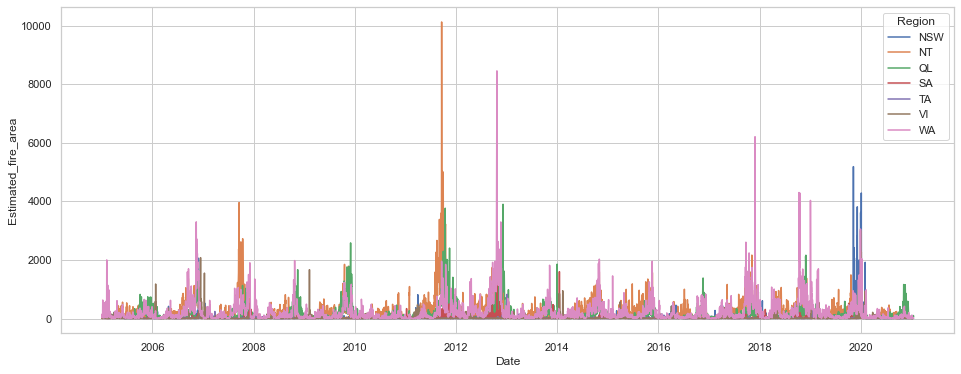

In [11]:
#For Historical_Wildfires
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=df_wildfires)

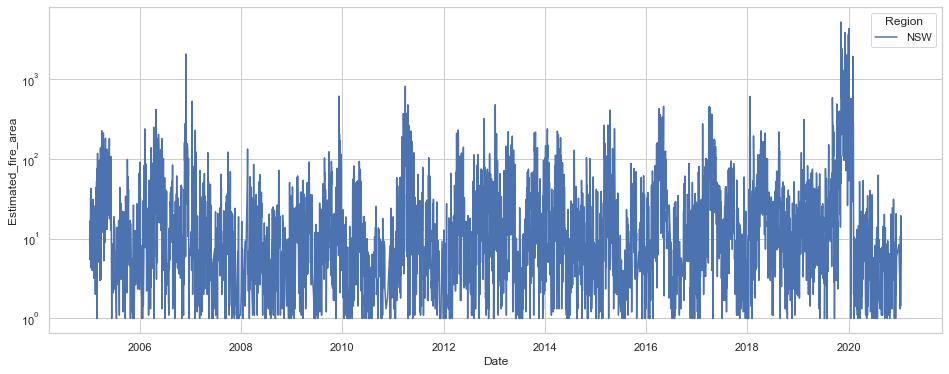

In [12]:
#Visualize Log wise Estimated Fire Area
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Estimated_fire_area", hue='Region',
                 data=df_wildfires[df_wildfires['Region']=='NSW'])
geo.set_yscale("log")

Text(0, 0.5, 'Estimated Fire Area')

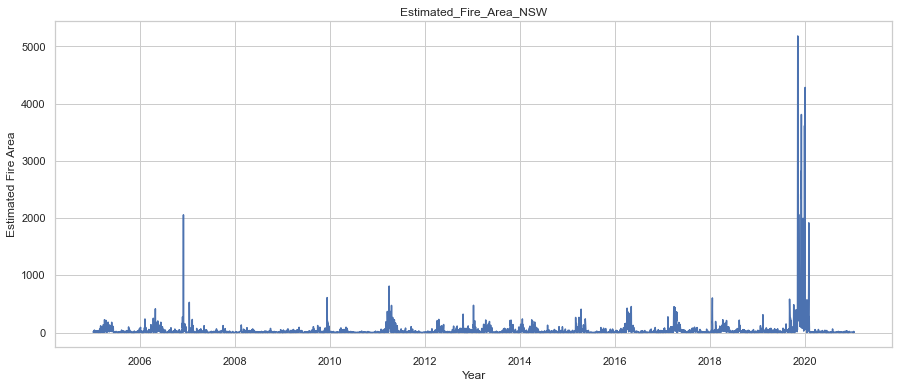

In [13]:
# To Visualize the Estimated  fire area for a specific region over time
fig, ax = plt.subplots(figsize = (15, 6))
df_NSW = df_wildfires[df_wildfires["Region"] == "NSW"]

sns.lineplot(df_NSW["Date"], df_NSW["Estimated_fire_area"])

ax.set_title("Estimated_Fire_Area_NSW")
ax.set_xlabel("Year")
ax.set_ylabel("Estimated Fire Area")



In [14]:
#Seasonality checking breaking Date into segments
df_NSW["day"] = df_NSW["Date"].dt.day
df_NSW["month"] = df_NSW["Date"].dt.month
df_NSW["year"] = df_NSW["Date"].dt.year


C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Text(0, 0.5, 'Fire Area - Seasonality')

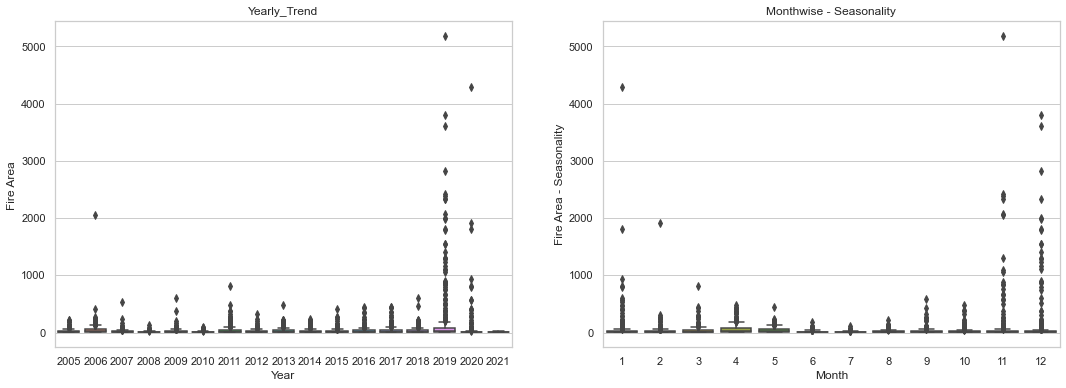

In [15]:
#Seasonality checking using Box plot for NSW
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.boxplot(df_NSW["year"], df_NSW["Estimated_fire_area"], ax = ax[0])
ax[0].set_title("Yearly_Trend")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Fire Area ")

sns.boxplot(df_NSW["month"], df_NSW["Estimated_fire_area"], ax = ax[1])
ax[1].set_title("Monthwise - Seasonality")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Fire Area - Seasonality")


### So, from the above Visualization of Historical_Wildfires Data it is shown that there is a Trend & Seasonality, Data is not Stationary 


# Now for the Historical_Weather Dataset
N.B: Daily aggregates computed from the hourly ERA5 climate re-analysis.

In [16]:
#Reading Data
df_weather=pd.read_csv("HistoricalWeather.csv")

df_weather.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [17]:
#Converting Date column to datetime
df_weather["Date"] = pd.to_datetime(df_weather["Date"])
df_weather.head()


,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [18]:
# Checking the info of Data
df_weather.info


<bound method DataFrame.info of              Date Region         Parameter  count()[unit: km^2]      min()  \
0      2005-01-01    NSW     Precipitation         8.002343e+05   0.000000   
1      2005-01-01    NSW  RelativeHumidity         8.002343e+05  13.877194   
2      2005-01-01    NSW  SoilWaterContent         8.002343e+05   0.002245   
3      2005-01-01    NSW    SolarRadiation         8.002343e+05  14.515009   
4      2005-01-01    NSW       Temperature         8.002343e+05  14.485785   
...           ...    ...               ...                  ...        ...   
245716 2021-01-09     WA  RelativeHumidity         2.528546e+06  11.286411   
245717 2021-01-09     WA  SoilWaterContent         2.528546e+06   0.000000   
245718 2021-01-09     WA    SolarRadiation         2.528546e+06  18.421680   
245719 2021-01-09     WA       Temperature         2.528546e+06  20.764585   
245720 2021-01-09     WA         WindSpeed         2.528546e+06   1.316897   

            max()     mean()  v

In [19]:
#DATA analysis
print("Number of records: {}".format(len(df_weather)))
print("Number of regions: {}\n".format(len(df_weather['Region'].unique())))
print(df_weather['Region'].unique())

Number of records: 245721
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


In [20]:
df_weather.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [21]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
count()[unit: km^2],245721.0,1.100786e+06,795500.527042,67785.261409,2.294532e+05,991315.104985,1.730605e+06,2.528546e+06
min(),245721.0,9.539645e+00,14.551590,-5.055067,7.669441e-07,2.373876,1.412145e+01,9.027615e+01
max(),245721.0,2.726031e+01,31.343030,0.000000,5.506519e+00,15.578515,3.215088e+01,5.098331e+02
mean(),245721.0,1.669513e+01,21.027521,0.000000,3.420428e-01,6.726836,2.506044e+01,9.595300e+01
variance(),245721.0,3.918512e+01,95.053784,0.000000,3.461215e-01,2.964714,1.663401e+01,2.064897e+03


In [22]:
#Checking for Missing values
df_weather.isna().sum()

Date                   0
Region                 0
Parameter              0
count()[unit: km^2]    0
min()                  0
max()                  0
mean()                 0
variance()             0
dtype: int64

In [23]:
#Checking for Data Type
df_weather.dtypes

Date                   datetime64[ns]
Region                         object
Parameter                      object
count()[unit: km^2]           float64
min()                         float64
max()                         float64
mean()                        float64
variance()                    float64
dtype: object

In [24]:
#Renaming the Columns
df_weather = df_weather.rename(columns={"count()[unit: km^2]": "Area", "min()": "Min",
                                       "max()": "Max", "mean()": "Mean", "variance()": "Variance"})

df_weather['Date'] = pd.to_datetime(df_weather['Date'])

df_weather.head()

,Date,Region,Parameter,Area,Min,Max,Mean,Variance
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [25]:
df_weather.head()

,Date,Region,Parameter,Area,Min,Max,Mean,Variance
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [26]:
#Checking for Unique Area
df_weather['Area'].unique()

array([ 800234.34898604, 1357560.87023056, 1730605.04292781,
        991315.10498463,   67785.26140857,  229453.17685432,
       2528545.65936048])

In [27]:
#Re-arranging Data
df_pivot = df_weather.pivot_table(values=['Min','Max','Mean','Variance'], index=['Date','Region'],
                                  columns=['Parameter'])

In [28]:
#Re-Set Index
df_pivot.reset_index(inplace=True)

In [29]:
#Rename Columns
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]

In [30]:
#Re-Arranging Columns & Data
params = df_pivot.columns.tolist()[3:]
params.sort()
weather_df = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_df.head()

,Date,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,2005-01-01,NSW,1.836935,0.044274,0.000000,0.028362,80.522964,36.355567,13.877194,253.559937,...,14.515009,6.078587,35.878704,27.341182,14.485785,18.562212,7.670482,3.323550,1.354448,0.850048
1,2005-01-01,NT,315.266815,9.884958,0.000000,546.059262,95.683342,61.494675,14.558820,584.201131,...,2.518120,58.942658,38.136787,29.881492,24.179960,12.920252,9.704402,5.296892,1.840394,1.930014
2,2005-01-01,QL,74.452164,1.453053,0.000000,35.641257,95.898270,47.959364,14.443199,403.134377,...,6.033827,29.500832,37.047943,28.842866,20.951620,13.792599,7.675632,3.483753,1.106028,0.883048
3,2005-01-01,SA,3.193624,0.059078,0.000000,0.042837,81.980751,30.057683,10.618136,246.044713,...,17.861103,7.914246,38.326847,30.793675,14.095855,34.799336,10.044715,4.657538,2.023657,1.655908
4,2005-01-01,TA,13.604791,3.099497,0.003973,12.068597,81.501442,65.086764,43.906574,111.754034,...,20.742302,12.826400,16.228510,11.788805,6.686816,4.912013,11.432408,5.408138,1.995647,2.963118


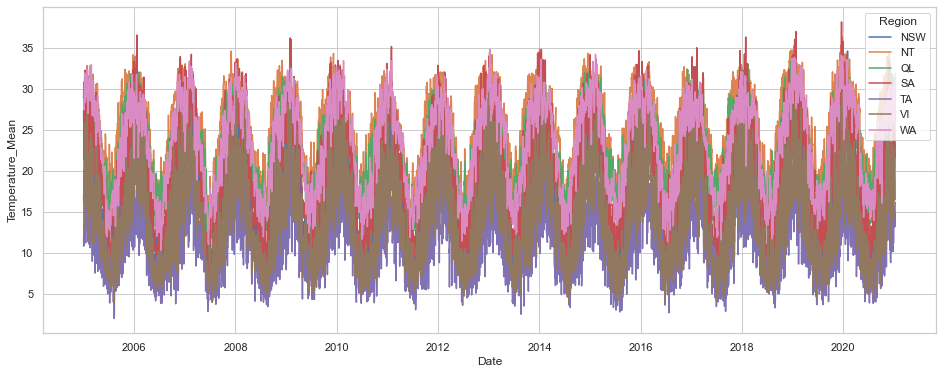

In [31]:
###Now, to Visualize Data taking Average Temperature 

plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Temperature_Mean",hue='Region', data=weather_df)

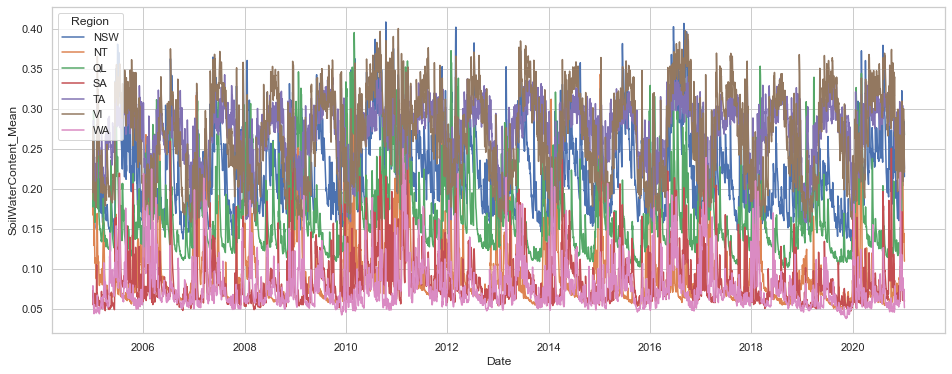

In [32]:
#Visualize Mean of Soilwatercontent
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="SoilWaterContent_Mean",hue='Region', data=weather_df)


### Historical Weather Forecast Data

In [33]:
#Reading file
df_forecast = pd.read_csv("HistoricalWeatherForecasts.csv")

df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

df_forecast.head()

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [34]:
### Forecast predictions cecking for each day

df_forecast['Lead time'].unique()

array([ 5, 10, 15], dtype=int64)

In [35]:
#Data Selection by Taking into a Single Region - Monthly
date1 = '2020-01-01'
date2='2020-01-31'

region1 = ('NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA')
forecast_New = df_forecast[(df_forecast['Region']== region1)]
forecast_New_1 = forecast_New.set_index(['Date'])
forecast_New_2 = forecast_New_1.loc[date1:date2]
forecast_New_2.head()

#forecast_NSW = df_forecast[(df_forecast['Parameter']== 'Temperature') & (df_forecast['Region']== region1)]
#forecast_NSW_1 = forecast_NSW_1.set_index(['Date'])
#forecast_NSW_2 = forecast_NSW_1.loc[date1:date2]
#forecast_NSW_2.head()

,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
Date,,,,,,,,


### Visualize to compare

In [36]:
#Observation in a same period

weather_df_NSW = weather_df[weather_df['Region']=='NSW']

weather_df_NSW = weather_df_NSW.set_index(['Date'])
observation_1 = weather_df_NSW.loc[date1:date2]
observation_1.head()


,Region,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NSW,3.668878,0.104289,0.0,0.146458,87.861794,30.291005,9.313578,386.401715,0.371896,...,20.980911,7.032370,37.017212,27.529635,14.403704,22.500503,6.587991,3.676050,1.145814,1.303046
2020-01-02,NSW,9.917132,0.253864,0.0,0.791259,91.251701,32.660449,7.294895,482.728062,0.373327,...,15.077473,8.872809,37.096256,28.886042,16.416523,22.007675,5.088723,3.265463,1.213501,0.574784
2020-01-03,NSW,1.681688,0.008512,0.0,0.005425,92.480141,27.166641,8.112389,317.563760,0.365096,...,26.110308,3.316400,39.985939,33.062747,19.849518,24.481774,7.190868,3.378213,1.395510,0.909916
2020-01-04,NSW,2.313565,0.065815,0.0,0.035870,74.164299,27.930265,14.596614,109.453610,0.354865,...,23.636795,3.551130,38.673840,31.853675,17.847557,19.003532,10.106893,4.620599,1.300415,3.281027
2020-01-05,NSW,10.003880,0.517439,0.0,0.956188,89.230743,45.874684,15.099000,329.066449,0.351612,...,8.245476,25.448863,36.978390,25.410221,10.446896,41.178617,8.764172,5.107051,1.278539,2.318480


NameError: name 'forecast_NSW_2' is not defined

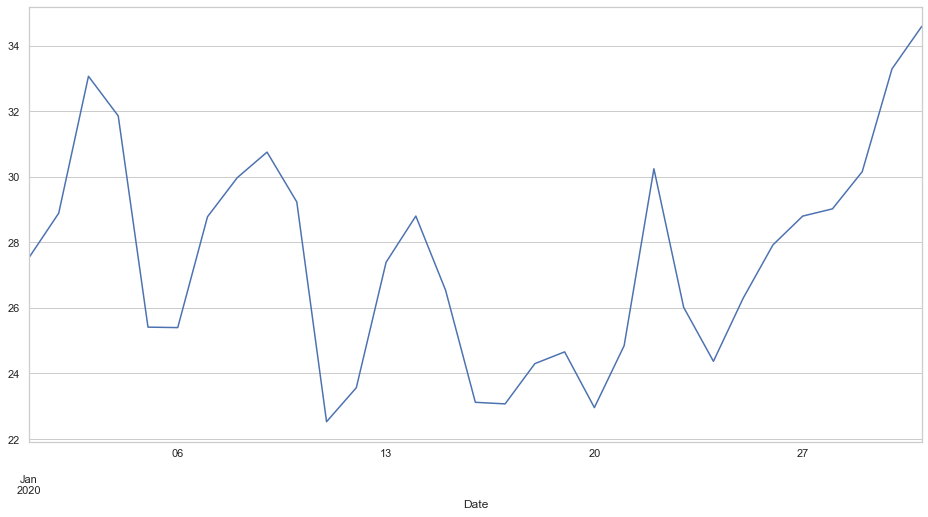

In [37]:
[fig,ax] = plt.subplots(1, figsize=(16, 8))

observation_1['Temperature_Mean'].plot();

forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 5].plot();
forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 10].plot();
forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 15].plot();

ax.legend(['observed T','5 day lead time','10 day lead time','15 day lead time']);

### Future Analysis:The above analysis of Historical Weather Forecast Data is the KEY to builds Model to predict before the Bushfire Happen!

In [38]:
# Now, Merging the Weather Data & Historical Forecast together
df_all = df_wildfires.merge(weather_df, how='left', on=['Date', 'Region'])

df_all.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,7.576938,40.255460,28.945488,23.055527,12.495799,9.455474,7.364222,4.841764,1.401951,1.494301
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,14.087289,29.763055,29.510120,22.425765,9.611800,13.352380,7.091141,4.014080,1.011328,1.043316
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,12.310518,22.667707,26.982698,20.621405,9.024039,11.764178,9.905821,4.477879,0.930842,1.953685
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,16.044561,6.949267,24.752069,19.632722,8.691216,7.940373,10.446799,4.017578,1.601724,1.102751
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,15.209880,27.822830,26.472469,21.477315,10.821342,12.063971,6.671862,3.884550,1.167861,0.774612


In [39]:
print(df_all)

      Region       Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0        NSW 2005-01-04             8.680000                      312.266667   
1        NSW 2005-01-05            16.611250                      322.475000   
2        NSW 2005-01-06             5.520000                      325.266667   
3        NSW 2005-01-07             6.264000                      313.870000   
4        NSW 2005-01-08             5.400000                      337.383333   
...      ...        ...                  ...                             ...   
26684     WA 2021-01-11             9.660000                      320.933333   
26685     WA 2021-01-12             9.011429                      325.292857   
26686     WA 2021-01-13            11.555556                      333.033333   
26687     WA 2021-01-14             4.410000                      321.612500   
26688     WA 2021-01-15            29.610000                      336.055000   

       Mean_estimated_fire_radiative_po

In [40]:
# Transpose the Data
df_all.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26689.0,143.771912,313.349568,1.000000,8.820000,3.824167e+01,146.412857,10120.943170
Mean_estimated_fire_brightness,26689.0,319.706604,8.886413,290.700000,313.963044,3.198380e+02,325.465217,381.950000
Mean_estimated_fire_radiative_power,26689.0,83.679701,67.788523,0.000000,44.118182,6.711714e+01,103.152381,2178.600000
Mean_confidence,26689.0,87.579269,4.374162,76.000000,85.000000,8.778125e+01,90.500000,100.000000
Std_confidence,24449.0,7.229078,1.997452,0.000000,6.687146,7.707661e+00,8.239279,16.970563
Var_confidence,24449.0,56.249225,25.927542,0.000000,44.717927,5.940804e+01,67.885714,288.000000
Count,26689.0,71.824272,150.507579,1.000000,5.000000,2.000000e+01,74.000000,3954.000000
Precipitation_Max,26663.0,18.075386,31.087577,0.000000,1.991909,7.119945e+00,20.645230,509.833069
Precipitation_Mean,26663.0,0.995859,2.055711,0.000000,0.031340,1.908576e-01,0.932644,27.747809
Precipitation_Min,26663.0,0.005274,0.089481,0.000000,0.000000,0.000000e+00,0.000000,4.023467


In [41]:
#Taking NSW DataFrame
df_NSW = df_all[df_all['Region']=='NSW']
df_NSW.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,7.576938,40.255460,28.945488,23.055527,12.495799,9.455474,7.364222,4.841764,1.401951,1.494301
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,14.087289,29.763055,29.510120,22.425765,9.611800,13.352380,7.091141,4.014080,1.011328,1.043316
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,12.310518,22.667707,26.982698,20.621405,9.024039,11.764178,9.905821,4.477879,0.930842,1.953685
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,16.044561,6.949267,24.752069,19.632722,8.691216,7.940373,10.446799,4.017578,1.601724,1.102751
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,15.209880,27.822830,26.472469,21.477315,10.821342,12.063971,6.671862,3.884550,1.167861,0.774612


### Region-wise Data Distribution

<Figure size 864x864 with 0 Axes>

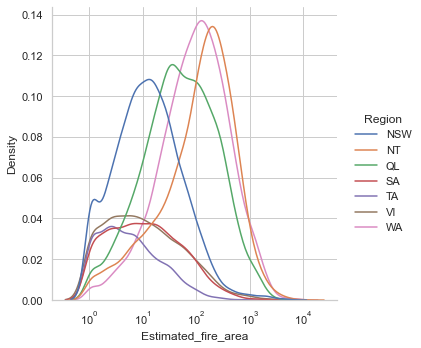

In [42]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

geo = sns.displot(data=df_all, x="Estimated_fire_area", hue="Region", kind="kde", log_scale=True)

<Figure size 864x864 with 0 Axes>

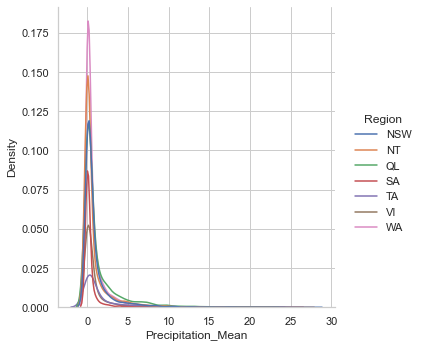

In [43]:
#Visualization on Average Precepitation
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
geo = sns.displot(data=df_all, x="Precipitation_Mean", hue="Region", kind="kde")

<Figure size 864x864 with 0 Axes>

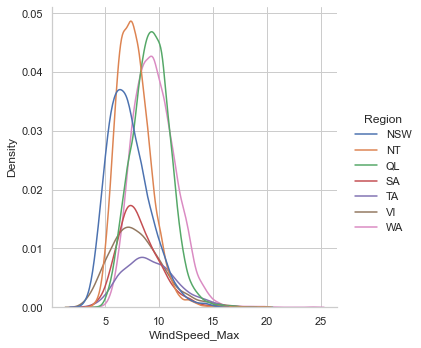

In [44]:
#Tofind Wind Speed
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
geo = sns.displot(data=df_all, x="WindSpeed_Max", hue="Region", kind="kde")

### Now, to find the Correlation 

<AxesSubplot:>

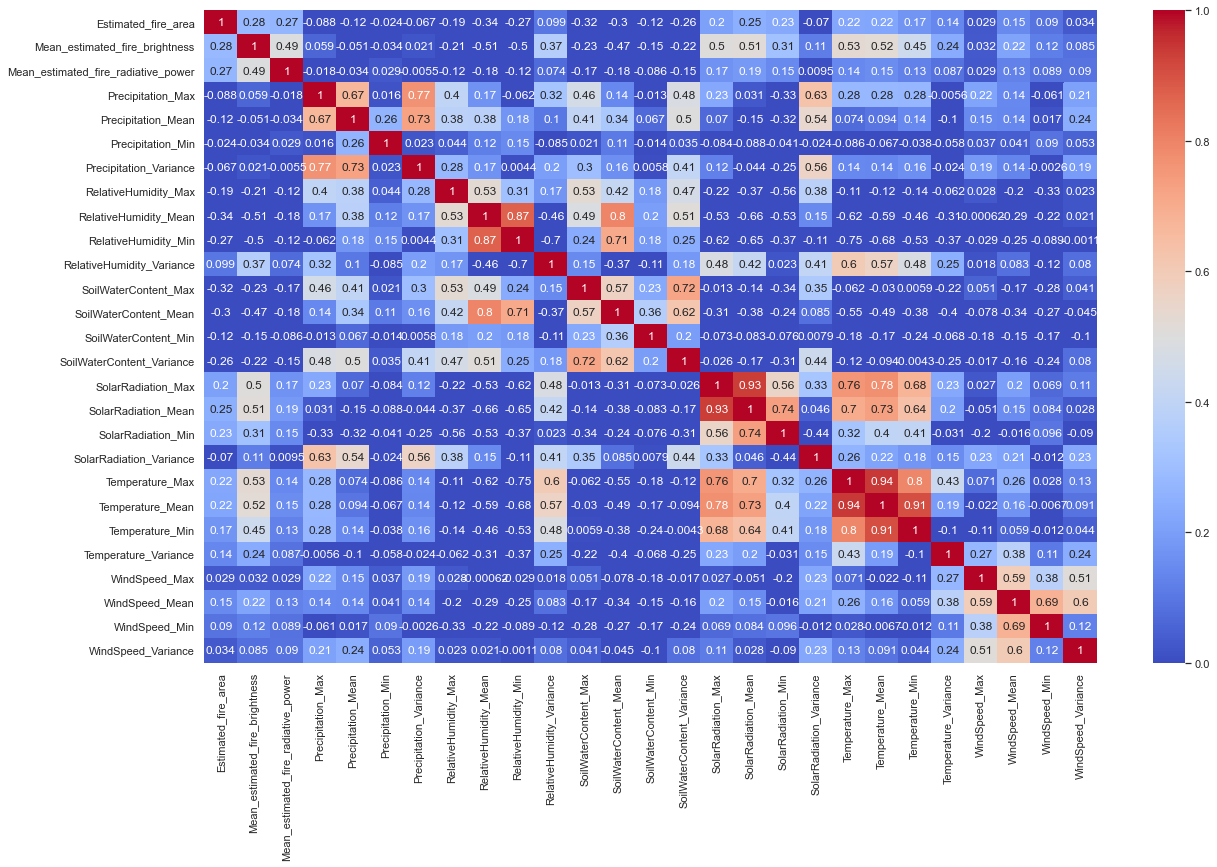

In [45]:
df_correlation = df_all.drop(['Region', 'Date', 'Mean_confidence', 'Std_confidence','Var_confidence','Count', 'Replaced'], axis=1).copy()

plt.figure(figsize = (20, 12))
sns.heatmap(df_correlation.corr(), cmap = "coolwarm", annot= True, vmin = 0, vmax = 1)

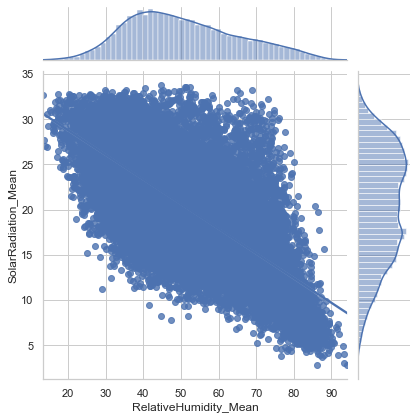

In [46]:
### Average Solar Radioation Vs. Relative Humidity
sns.jointplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', data=df_all, kind="reg")

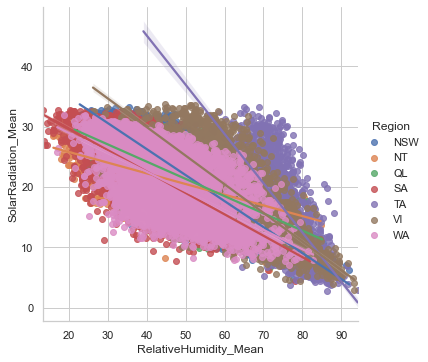

In [47]:
sns.lmplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all)

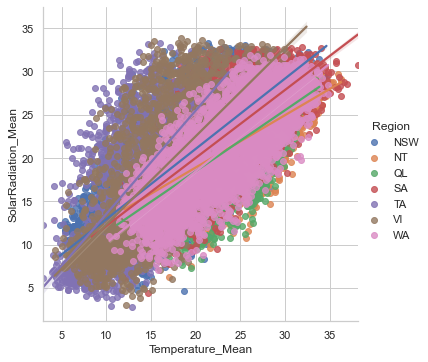

In [48]:
sns.lmplot(x='Temperature_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all)

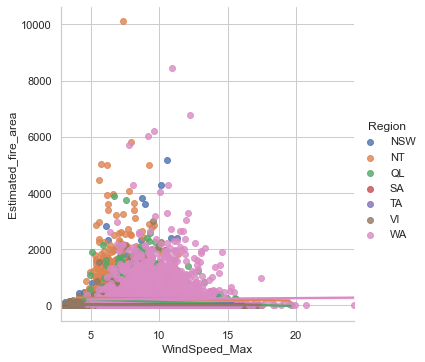

In [49]:
sns.lmplot(x='WindSpeed_Max', y='Estimated_fire_area', hue='Region', data=df_all)

In [50]:
print(df_all)

      Region       Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0        NSW 2005-01-04             8.680000                      312.266667   
1        NSW 2005-01-05            16.611250                      322.475000   
2        NSW 2005-01-06             5.520000                      325.266667   
3        NSW 2005-01-07             6.264000                      313.870000   
4        NSW 2005-01-08             5.400000                      337.383333   
...      ...        ...                  ...                             ...   
26684     WA 2021-01-11             9.660000                      320.933333   
26685     WA 2021-01-12             9.011429                      325.292857   
26686     WA 2021-01-13            11.555556                      333.033333   
26687     WA 2021-01-14             4.410000                      321.612500   
26688     WA 2021-01-15            29.610000                      336.055000   

       Mean_estimated_fire_radiative_po

In [51]:
import pandas as pd 
import numpy as np 

df_all_new = pd.DataFrame(df_all, columns=['Date','Region','Estimated_fire_area'])#create DataFrame 
print("Original DataFrame:") 
print(df_all_new) 

df_all_new.to_csv('df_all.csv',index=True,header=True) 
new_df = pd.read_csv('df_all_new.csv') 
print(new_df) 

Original DataFrame:
            Date Region  Estimated_fire_area
0     2005-01-04    NSW             8.680000
1     2005-01-05    NSW            16.611250
2     2005-01-06    NSW             5.520000
3     2005-01-07    NSW             6.264000
4     2005-01-08    NSW             5.400000
...          ...    ...                  ...
26684 2021-01-11     WA             9.660000
26685 2021-01-12     WA             9.011429
26686 2021-01-13     WA            11.555556
26687 2021-01-14     WA             4.410000
26688 2021-01-15     WA            29.610000

[26689 rows x 3 columns]


FileNotFoundError: [Errno 2] No such file or directory: 'df_all_new.csv'

In [52]:
df_all_new.info

<bound method DataFrame.info of             Date Region  Estimated_fire_area
0     2005-01-04    NSW             8.680000
1     2005-01-05    NSW            16.611250
2     2005-01-06    NSW             5.520000
3     2005-01-07    NSW             6.264000
4     2005-01-08    NSW             5.400000
...          ...    ...                  ...
26684 2021-01-11     WA             9.660000
26685 2021-01-12     WA             9.011429
26686 2021-01-13     WA            11.555556
26687 2021-01-14     WA             4.410000
26688 2021-01-15     WA            29.610000

[26689 rows x 3 columns]>